In [1]:
from libraries import *
from modelling_qsar import QSAR
from evidence_combinator import Single_Evidence, Evidece_Combinator

### QSAR model

In [2]:
from sklearn.ensemble import RandomForestClassifier

hansen_ames = r"G:\My Drive\UPF\projects\dst\dst_evidence_combinator\examples\data\ames_hansen_train.sdf"
ames_test = r"G:\My Drive\UPF\projects\dst\dst_evidence_combinator\examples\data\ames_test.sdf"

# initiate class
Ames_RF = QSAR(hansen_ames)

# compute descriptors for modelling
Ames_RF.compute_descriptors('MolecularDescriptors')

#build model 
Ames_RF.model(model=RandomForestClassifier(random_state=28, n_estimators = 700,min_samples_split=10,min_samples_leaf=3, max_features='sqrt', max_depth=100, bootstrap=False))

# return reliability with prior
Ames_RF_reliability = Ames_RF.get_performance(prior=0.35)

# return prediction for the test
Ames_RF_prediction = Ames_RF.predict_proba(ames_test)

INFO - Computing MolecularDescriptors for uploaded training dataset...


100%|█████████████████████████████████████████████████████████████████████████████| 6178/6178 [00:39<00:00, 158.16it/s]


INFO - Building model...
INFO - Returning updated model performance considering prior probability...
INFO - Computing MolecularDescriptors for uploaded test dataset...


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 160.55it/s]

INFO - Predicting percent probability for the test series...


### Select one molecule

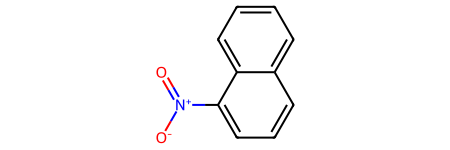

In [19]:
Ames_RF.test['molecule'][1]

In [5]:
QSAR_prediction, QSAR_reliability = Ames_RF_prediction[1], Ames_RF_reliability

### Load evidence using Single_Evidence class

Relevance --> key from dict {'certain':1,'plausible':0.9,'probable':0.75,'equivocal':0.5}

In [7]:
Ames_QSAR = Single_Evidence(identifier = 'RF', source = 'QSAR', result = QSAR_prediction, reliability = QSAR_reliability, relevance='certain')


INFO - Processing evidence identified as RF of type qsar.


In [8]:
Ames_MPF = Single_Evidence(identifier = 'mpf', source = 'in vitro', result = 1, reliability = 0.85, relevance='plausible')

INFO - Processing evidence identified as mpf of type in vitro.


In [21]:
Ames_expert = Single_Evidence(identifier = 'Verena', source = 'expert', result = 0.8, reliability = 0.95, relevance='certain', weight=3)

INFO - Processing evidence identified as Verena of type expert.


### Show single components

In [10]:
Ames_QSAR.show_components()

Showing the basic probability assignments of provided evidence...


,Negative,Uncertain,Positive
RF,0.107366,0.287232,0.605402


Showing the belief and plausibility for outcomes associated with provided evidence...


,Belief (Negative),Plausibility (Negative),Belief (Positive),Plausibility (Positive)
RF,0.107366,0.394598,0.605402,0.892634


INFO - Default settings kept for decision and uncertainty thresholds!


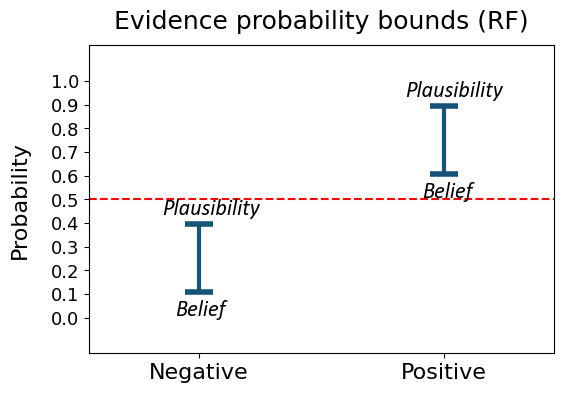

Evidence identified as RF of type qsar suggests that that the result is positive !


In [12]:
Ames_QSAR.decision_maker()

### Combine using Combinator


In [20]:
Nitronaphthalene_1 = Evidece_Combinator('Ames mutagenicity')

INFO - Evidence Combinator initiated for the endpoint "Ames mutagenicity"...


In [22]:
Nitronaphthalene_1.add_evidence(Ames_QSAR)
Nitronaphthalene_1.add_evidence(Ames_MPF)
Nitronaphthalene_1.add_evidence(Ames_expert)

INFO - Adding evidence with identifier "RF" of type "QSAR"...
INFO - Adding evidence with identifier "mpf" of type "in vitro"...
INFO - Adding evidence with identifier "Verena" of type "expert"...


In [24]:
Nitronaphthalene_1.combination(rule_selection='auto', WoE=True)


INFO - Running evidence combination...
INFO - Considering individual weights of evidence...
INFO - Computing ground probability masses...
INFO - Combining evidence...
INFO - Automatised rule selection...
INFO - Choosing Dempster's rule: Agreement between sources and none exceeding uncertainty threshold.


INFO - Showing results for added evidence...


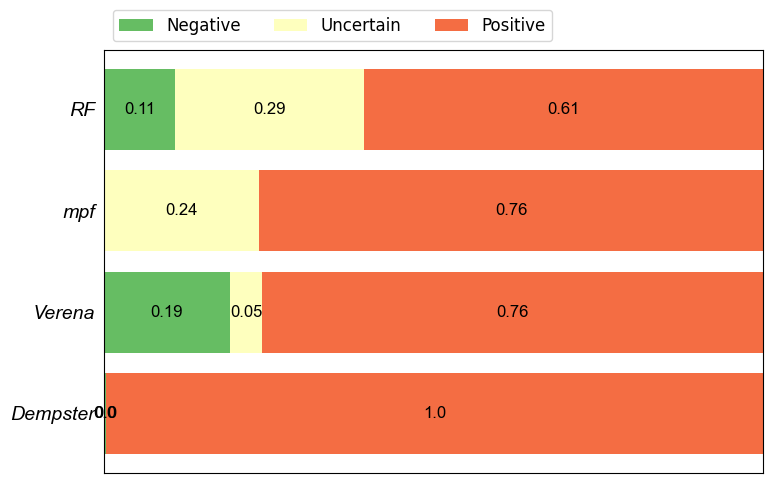

INFO - The collected evidence suggests that that the result is positive !


In [26]:
Nitronaphthalene_1.decision_maker()